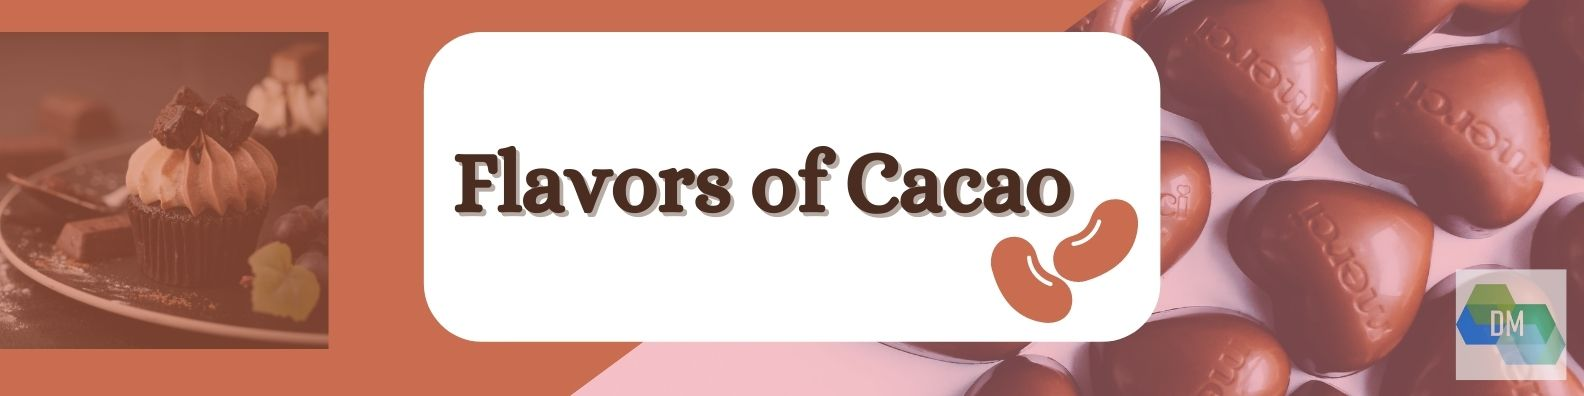

<blockquote>📌For this notebook, csv has been prepared by webscraping data using Beautiful soup from Chocolate Bar ratings database available at http://flavorsofcacao.com/chocolate_database.html</blockquote>

### <h3 style="background-color:#913e0a;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#913e0a;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
# Importing and Reading the Dataset
df= pd.read_csv("../input/flavors-of-cacao/flavorsofcaco_raw.csv")

In [3]:
df_row_count, df_column_count=df.shape
print('Total number of rows:', df_row_count)
print('Total number of columns:', df_column_count)

Total number of rows: 2312
Total number of columns: 10


In [4]:
df.head(5)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Esta#te, ba#tch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


In [5]:
df=df.drop(['REF'],axis=1)

In [6]:
# Rename multiple columns
df.rename(columns = {"Company (Manufacturer)":"Company", "Company Location":"HQ","Review Date": "Review_date","Country of Bean Origin":"Bean_origin","Specific Bean Origin or Bar Name": "Bar_name","Cocoa Percent":"percentCacao","Most Memorable Characteristics":"Characteristics"}, inplace="True")
df.head(1)

,Company,HQ,Review_date,Bean_origin,Bar_name,percentCacao,Ingredients,Characteristics,Rating
0,5150,U.S.A.,2019,Madagascar,"Bejofo Esta#te, ba#tch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75


In [7]:
print ("Unique values are:\n",df.nunique().sort_values(ascending = False))

Unique values are:
 Characteristics    2270
Bar_name           1450
Company             541
HQ                   67
Bean_origin          63
percentCacao         55
Ingredients          21
Review_date          15
Rating               13
dtype: int64


In [8]:
# remove special characters from Bar name column
df = df.replace('#','', regex=True)
#print df
df.iloc[:10]

,Company,HQ,Review_date,Bean_origin,Bar_name,percentCacao,Ingredients,Characteristics,Rating
0,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
5,A. Morin,France,2013,Venezuela,Chuao,70%,"4- B,S,C,L","oily, nut, caramel, raspberry",4.00
6,A. Morin,France,2013,Peru,Chanchamayo Province,63%,"3- B,S,C","sweet, cocoa, tangerine",4.00
7,A. Morin,France,2013,Ecuador,Equateur,70%,"4- B,S,C,L","sandy, nutty, cocoa, fig",3.75
8,A. Morin,France,2013,Peru,Chanchamayo Province,70%,"4- B,S,C,L","cocoa,sour,intense tangerine",3.50
9,A. Morin,France,2013,Brazil,Brazil,70%,"4- B,S,C,L",mild tobacco,3.25


In [9]:
df['percentCacao'] = df['percentCacao'].str.replace('[%]', '')
df['percentCacao'] = df['percentCacao'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          2312 non-null   object 
 1   HQ               2312 non-null   object 
 2   Review_date      2312 non-null   int64  
 3   Bean_origin      2312 non-null   object 
 4   Bar_name         2312 non-null   object 
 5   percentCacao     2312 non-null   float64
 6   Ingredients      2224 non-null   object 
 7   Characteristics  2312 non-null   object 
 8   Rating           2312 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 162.7+ KB


In [11]:
df.describe()

,Review_date,percentCacao,Rating
count,2312.000000,2312.000000,2312.000000
mean,2013.760813,70.414490,3.184083
std,3.591105,10.891678,0.451961
min,2006.000000,0.650000,1.000000
25%,2011.000000,70.000000,3.000000
50%,2014.000000,70.000000,3.250000
75%,2016.000000,74.000000,3.500000
max,2020.000000,100.000000,4.000000


### <h3 style="background-color:#913e0a;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [12]:
df.isna().sum().sort_values(ascending =False)

Ingredients        88
Company             0
HQ                  0
Review_date         0
Bean_origin         0
Bar_name            0
percentCacao        0
Characteristics     0
Rating              0
dtype: int64

In [13]:
df['Rating'].describe()

count    2312.000000
mean        3.184083
std         0.451961
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

In [14]:
#print count of Rating
df.Rating.value_counts().sort_index(ascending=False)

4.00    102
3.75    270
3.50    503
3.25    405
3.00    488
2.75    317
2.60      1
2.50    159
2.25     17
2.00     33
1.75      3
1.50     10
1.00      4
Name: Rating, dtype: int64

### <h3 style="background-color:#913e0a;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

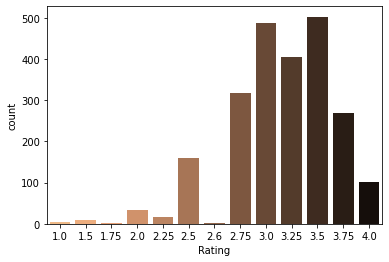

In [15]:
#Getting an idea about the distribution of ratings
p = sns.countplot(data=df, x = 'Rating', palette='copper_r')

In [16]:
df['grade']='Unpleasant'
df.iloc[:1]

,Company,HQ,Review_date,Bean_origin,Bar_name,percentCacao,Ingredients,Characteristics,Rating,grade
0,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Unpleasant


In [17]:
#Ratings
#5 = Elite (Transcending beyond the ordinary limits)
#4 = Premium (Superior flavor development, character and style)
#3 = Satisfactory (3.0) to praiseworthy (3.75) (well made with special qualities)
#2 = Disappointing (Passable but contains at least one significant flaw)
#1 = Unpleasant (mostly unpalatable)

df.grade[(df.Rating > 1) & (df.Rating <=2)] = 'Disappointing'
df.grade[(df.Rating > 2) & (df.Rating <=3)] = 'Satisfactory'
df.grade[(df.Rating > 3) & (df.Rating <=4)] = 'Premium'
df.grade[(df.Rating > 4)] = 'Elite'
df.grade.value_counts()

Premium          1280
Satisfactory      982
Disappointing      46
Unpleasant          4
Name: grade, dtype: int64

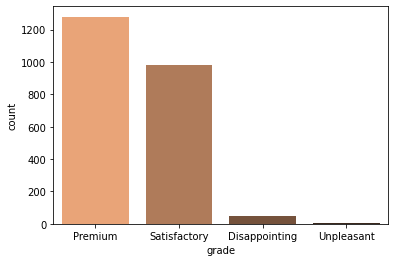

In [18]:
p = sns.countplot(data=df, x = 'grade', palette='copper_r')

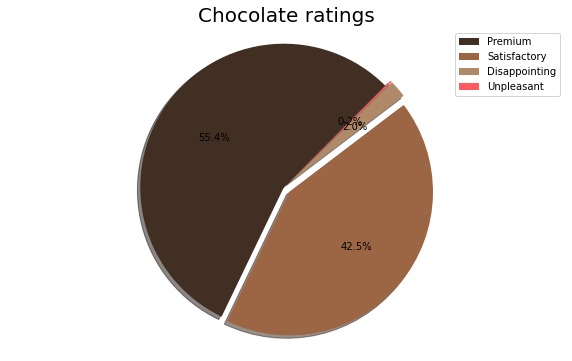

mean chocolate rating is =  3.2


In [19]:
# Chocolate ratings
plt.figure(figsize = (10,6))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%',colors=['#422f24','#9c6644','#b08968','#ff5a5f'],shadow=True,startangle=45,explode=[0, 0.05,0.05, 0.05])
plt.legend(labels, loc="upper right")
plt.axis('equal')
plt.title('Chocolate ratings', fontsize = 20)
plt.show()
print("mean chocolate rating is = ", round(df["Rating"].mean(),1))

In [20]:
df.HQ.value_counts().iloc[:10]

U.S.A.         966
France         175
Canada         161
U.K.           126
Italy           73
Belgium         59
Ecuador         57
Australia       53
Switzerland     43
Germany         42
Name: HQ, dtype: int64

In [21]:
df.percentCacao.value_counts().sort_index(ascending=False)

100.00     20
99.00       2
91.00       3
90.00       8
89.00       2
88.00       8
87.00       1
86.00       1
85.00      40
84.00       4
83.00       4
82.00      18
81.00       6
80.00      84
79.00       1
78.00      19
77.00      37
76.00      33
75.00     274
74.00      60
73.50       2
73.00      59
72.50       4
72.00     257
71.50       2
71.00      42
70.00     918
69.00      12
68.00      60
67.00      30
66.00      27
65.00      87
64.00      34
63.00      14
62.00      14
61.00       7
60.50       1
60.00      46
58.00       8
57.00       1
56.00       2
55.00      16
53.00       1
50.00       1
46.00       1
42.00       1
0.78        1
0.77        1
0.75       13
0.74        2
0.72        2
0.70       18
0.68        1
0.65        2
Name: percentCacao, dtype: int64

In [22]:
df['percent']= 1
df.iloc[:1]

,Company,HQ,Review_date,Bean_origin,Bar_name,percentCacao,Ingredients,Characteristics,Rating,grade,percent
0,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Premium,1


In [23]:
#percent cacao
# grouping the rating : 80-100, 70-79, 60-69, 40-59 and <40

df.percent[(df.percentCacao > 70) & (df.percentCacao <=100)] = 80
df.percent[(df.percentCacao > 60) & (df.percentCacao <=69)] = 70
df.percent[(df.percentCacao > 50) & (df.percentCacao <=59)] = 60
df.percent[(df.percentCacao > 40) & (df.percentCacao <=49)] = 50
df.percent[(df.percentCacao <= 40)] = 1  # since we know that all remaining ratings are <1
df.percent.value_counts().sort_index(ascending=False)

80     991
70     286
60      28
50       2
1     1005
Name: percent, dtype: int64

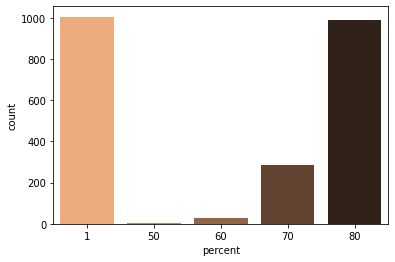

In [24]:
p = sns.countplot(data=df, x = 'percent', palette='copper_r')

In [25]:
df.Bean_origin.value_counts().sort_values(ascending=False).iloc[:10]

Venezuela             245
Peru                  220
Ecuador               212
Dominican Republic    206
Madagascar            163
Blend                 151
Nicaragua              92
Brazil                 75
Bolivia                72
Belize                 67
Name: Bean_origin, dtype: int64

In [26]:
df.Bar_name.value_counts().sort_values(ascending=False).iloc[:10]

Madagascar            54
Ecuador               42
Peru                  40
Dominican Republic    37
Chuao                 24
Venezuela             20
Kokoa Kamili          17
Papua New Guinea      17
Sambirano             17
Belize                16
Name: Bar_name, dtype: int64

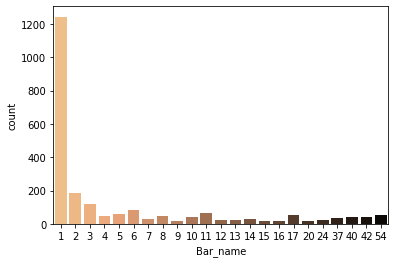

In [27]:
count=df.Bar_name.value_counts()
p = sns.countplot(data=count, x = df['Bar_name'], palette='copper_r')

<AxesSubplot:title={'center':'Correlation map for variables'}>

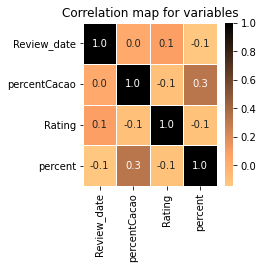

In [28]:
#correlation map for features
f,ax = plt.subplots(figsize=(3, 3))
ax.set_title('Correlation map for variables')
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="copper_r")

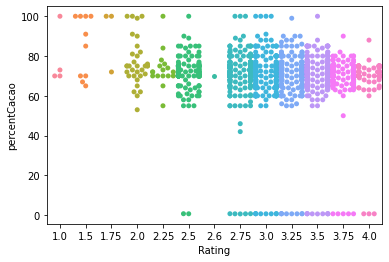

In [29]:
#Group the swarms by a categorical variable:

ax = sns.swarmplot(x="Rating", y="percentCacao", data=df)

<AxesSubplot:xlabel='Ingredients', ylabel='Characteristics'>

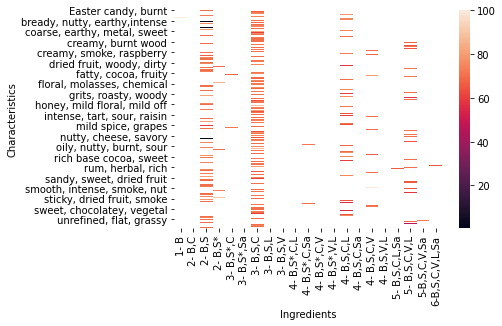

In [30]:
pivot = df.pivot_table( index=["Characteristics"],columns=["Ingredients"],values="percentCacao", aggfunc=np.average)
sns.heatmap(pivot)